In [1]:
# PyTorch
from torchvision import transforms, datasets, models
import torch
from torch import optim, cuda
from torch.utils.data import DataLoader, sampler
import torch.nn as nn

# Data science tools
import numpy as np
import pandas as pd
import os

# Image manipulations
from PIL import Image

import matplotlib.pyplot as plt

In [2]:
import scipy
import zipfile
import sklearn
from sklearn import metrics
# Timing utility
from timeit import default_timer as timer
import json

from utils import get_file_label_mapping, TestImageDataset

In [3]:
checkpoint_dir = "checkpoint"
model_names = [
    "/add-1-extra-layer-batch-32/",
    "/add-1-extra-layer-batch-64/",
    "/add-1-extra-layer-batch-128/",
    "/add-1-extra-layer-with-augmentation-batch-32/",
    "/add-1-extra-layer-with-augmentation-batch-64/",
    "/add-1-extra-layer-with-augmentation-batch-128/",
]

In [4]:
def get_results(results_dir):
    filename = results_dir + "results.json"
    f = open(filename)
    data = json.load(f)

    val_loss = []
    val_acc = []
    train_loss = []
    train_acc = []

    for x in data.values():
        val_loss = x["val_loss"]
        val_acc = x["val_acc"]
        train_loss = x["train_loss"]
        train_acc = x["train_acc"]

    return {
        "val_loss": val_loss,
        "val_acc": val_acc,
        "train_loss": train_loss,
        "train_acc": train_acc,
    }

In [5]:
collated_results = {}

for model in model_names:    
    results_dir = checkpoint_dir + "/" + model
    results = get_results(results_dir)
    collated_results[model] = results

In [6]:
collated_results

{'/add-1-extra-layer-batch-32/': {'val_loss': [0.7399482131004333,
   0.5949221849441528,
   0.5262566804885864,
   0.5058522820472717,
   0.49093490839004517,
   0.4815070927143097,
   0.4628100097179413,
   0.4621715545654297,
   0.44869863986968994,
   0.47124260663986206,
   0.464351624250412,
   0.467763751745224],
  'val_acc': [0.8298611111111112,
   0.8533653846153846,
   0.8632478632478632,
   0.8812767094017093,
   0.8695245726495726,
   0.8791399572649573,
   0.8842147435897435,
   0.8776709401709402,
   0.8858173076923077,
   0.8896901709401709,
   0.8863514957264957,
   0.8824786324786325],
  'train_loss': [1.652294635772705,
   0.607470691204071,
   0.4653657376766205,
   0.35424938797950745,
   0.31896108388900757,
   0.29355588555336,
   0.2399887591600418,
   0.2323562651872635,
   0.21309922635555267,
   0.19879727065563202,
   0.1952279806137085,
   0.1832621544599533],
  'train_acc': [0.6165650406504065,
   0.8396849593495936,
   0.8664634146341463,
   0.901676829268

In [7]:
def visualise(collated_results, metrics):
    for model, results in collated_results.items():
        y = results[metrics]
        x = np.arange(1, len(y) + 1)
        plt.plot(x, y, label=model)

    plt.xlabel("epoch")
    plt.ylabel(metrics)
    plt.legend()

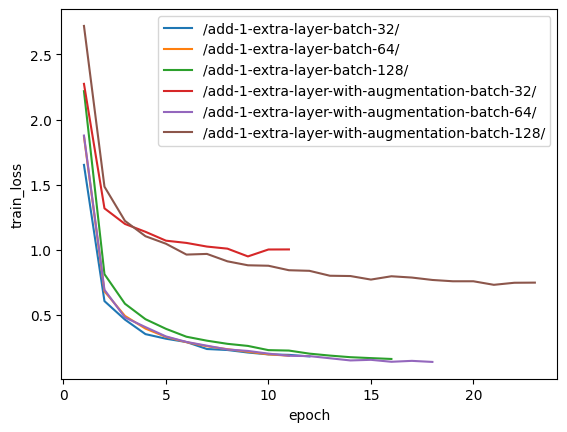

In [8]:
visualise(collated_results, "train_loss")

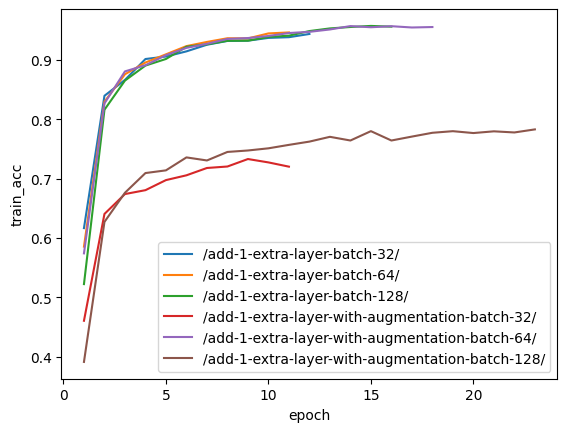

In [9]:
visualise(collated_results, "train_acc")

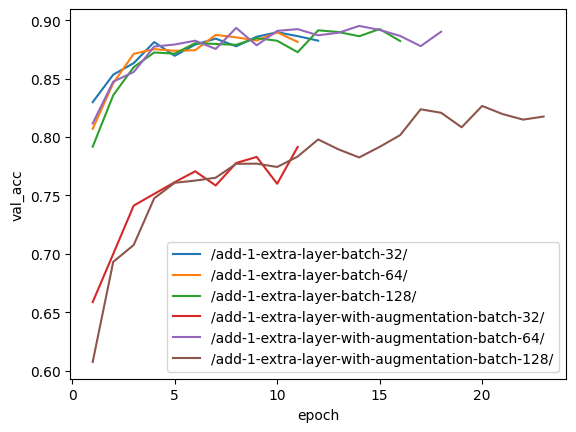

In [10]:
visualise(collated_results, "val_acc")


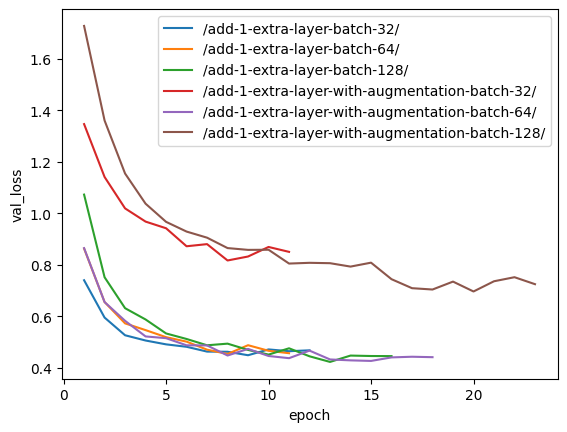

In [11]:
visualise(collated_results, "val_loss")
